In [22]:
#load in the data
import pandas as pd
df = pd.read_csv("week2.csv")

In [23]:
import numpy as np

#Store data in X and y
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))

plus = 0
minus = 0
y=df.iloc[:,2]
for i in range(len(y)):
    if(y[i]==-1):
        minus = minus + 1
    if(y[i]==+1):
        plus = plus + 1

print(plus)
print(minus)

baseline = (796/(203+796))*100
print(baseline)

796
203
79.67967967967968


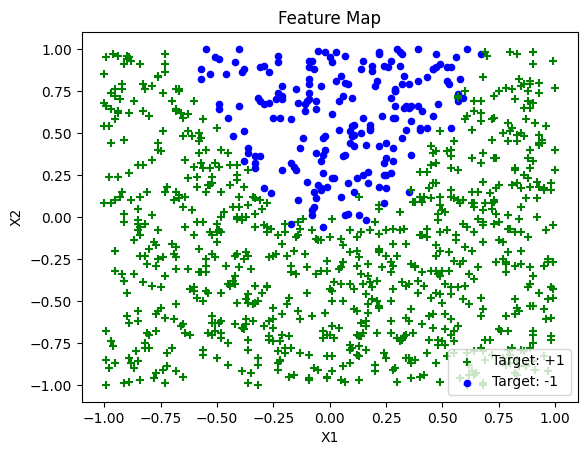

In [14]:
#A (i) - Visualise the data on a 2D plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Define marker types based on the target values (+1 or -1)
markers = {1: '+', -1: 'o'}
colors = {1: 'green', -1: 'blue'}

legend_handles = []
legend_labels = []

for i in range(len(X)-1):
    marker = markers[y.iloc[i]]
    color = colors[y.iloc[i]]
    marker_size = 40 if color == 'green' else 20
    ax.scatter(X[i, 0], X[i, 1], marker=marker,s=marker_size, color=color)


# Customize the plot
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Feature Map')

legend_handles.append(ax.scatter([], [], marker='+', color='green', s=40))
legend_labels.append('Target: +1')

legend_handles.append(ax.scatter([], [], marker='o', color='blue', s=20))
legend_labels.append('Target: -1')


leg = ax.legend(legend_handles, legend_labels, loc='lower right')

# Show the plot
plt.show()

In [24]:
#a-(ii)
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
model = LogisticRegression(penalty='none', solver='lbfgs')
model.fit(X, y)

# Getting the coefficients (parameters) of the trained model
coef_feature1, coef_feature2 = model.coef_.flatten()
intercept = model.intercept_[0]
print('intercept = %f, slopes = (%f, %f)' % (model.intercept_, *model.coef_[0]))


print("Logistic Regression Model:")
print(f"Prediction = 1 / (1 + exp(-({coef_feature1:.2f}*Feature1 + {coef_feature2:.2f}*Feature2 + {intercept:.2f})))")
print("\nCoefficients (Parameters):")
print(f"Feature 1 Coefficient: {coef_feature1:.2f}")
print(f"Feature 2 Coefficient: {coef_feature2:.2f}")
print(f"Intercept: {intercept:.2f}")

intercept = 2.306052, slopes = (-0.152506, -3.683772)
Logistic Regression Model:
Prediction = 1 / (1 + exp(-(-0.15*Feature1 + -3.68*Feature2 + 2.31)))

Coefficients (Parameters):
Feature 1 Coefficient: -0.15
Feature 2 Coefficient: -3.68
Intercept: 2.31


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [25]:
from sklearn.metrics import accuracy_score
#make the predictions and check accuracy


predictions = model.predict(X)


accuracy = accuracy_score(y, predictions)
print('accuracy = %f' % (accuracy))
# set up decision boundary function
m0, m1, c = model.coef_[0][0], model.coef_[0][1], model.intercept_
boundary_f = lambda x: -((m0 * x) + c) / m1

accuracy = 0.835836


In [11]:
def plot(X,y,predictions,boundary_f):
 fig, ax = plt.subplots()

 # Define marker types based on the target values (+1 or -1)
 markers = {1: 'o', -1: 'o'}
 colors = {1: 'green', -1: 'blue'}

 # Plot the training data points
 for i in range(len(X)):
    marker = markers[y.iloc[i]]
    color = colors[y.iloc[i]]
    ax.scatter(X[i, 0], X[i, 1], marker=marker, s=60, color=color, )

 # Plot the decision boundary
 x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
 y_values = boundary_f(x_values)
 ax.plot(x_values, y_values, color='black', linestyle='--', label='Decision Boundary')

 # Plot the predictions
 for i in range(len(X)):
    marker = markers[predictions[i]]
    color = 'red' if predictions[i] == 1 else 'yellow'
    ax.scatter(X[i, 0], X[i, 1], marker=marker, s=15, color=color,)

 # Customize the plot
 ax.set_xlabel('Feature 1')
 ax.set_ylabel('Feature 2')
 ax.set_title('Training Data vs Predictions')
 ax.legend()

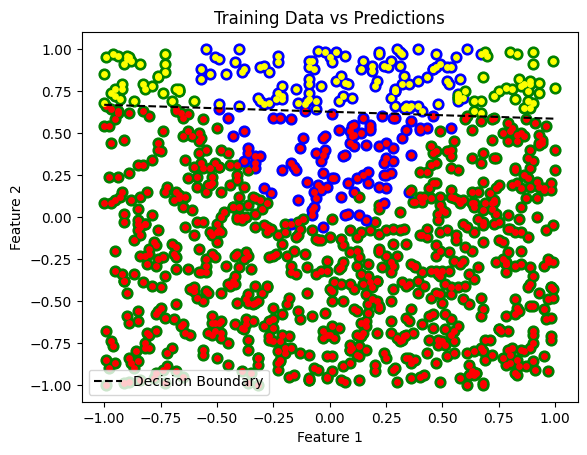

In [88]:
plot(X,y,predictions,boundary_f)

In [12]:
from sklearn.svm import LinearSVC
def svc(X,y,c):
 SVCmodel = LinearSVC(C=c).fit(X, y)

 predictions = SVCmodel.predict(X)
 accuracy = accuracy_score(y, predictions)
 print("Paramater ")
 print('accuracy = %f' % (accuracy))

 coef_feature1, coef_feature2 = SVCmodel.coef_.flatten()
 intercept = SVCmodel.intercept_[0]
 m0, m1, c = SVCmodel.coef_[0][0], SVCmodel.coef_[0][1], SVCmodel.intercept_
 boundary_f = lambda x: -((m0 * x) + c) / m1

 print(f"Feature 1 Coefficient: {coef_feature1:.2f}")
 print(f"Feature 2 Coefficient: {coef_feature2:.2f}")
 print(f"Intercept: {intercept:.2f}\n")

 
 plot(X,y,predictions,boundary_f)

Paramater 
accuracy = 0.796797
Feature 1 Coefficient: 0.00
Feature 2 Coefficient: -0.31
Intercept: 0.39



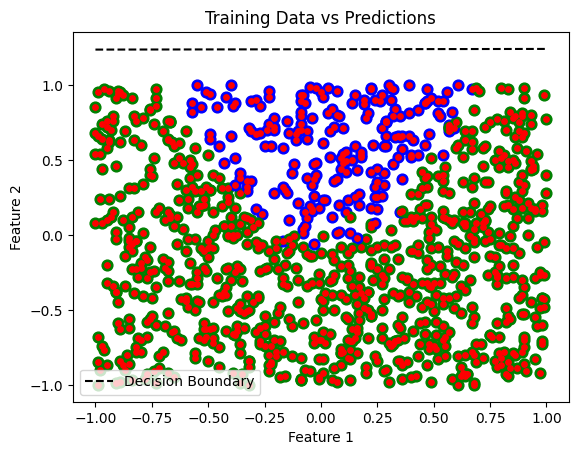

In [26]:
svc(X,y,0.001)
#svc(X,y,1)
#svc(X,y,10)
#svc(X,y,1000)

In [32]:
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X3=X1**2
X4=X2**2
Xe = np.column_stack((X1, X2, X3, X4))


ye=df.iloc[:,2]

# Initialize and train the logistic regression model
model2 = LogisticRegression(penalty='none', solver='lbfgs')
model2.fit(Xe, ye)

coef_feature1, coef_feature2,coef_feature3, coef_feature4 = model2.coef_.flatten()
intercept = model2.intercept_[0]




print("\nCoefficients (Parameters):")
print(f"Feature 1 Coefficient: {coef_feature1:.2f}")
print(f"Feature 2 Coefficient: {coef_feature2:.2f}")
print(f"Feature 3 Coefficient: {coef_feature3:.2f}")
print(f"Feature 4 Coefficient: {coef_feature4:.2f}")
print(f"Intercept: {intercept:.2f}")

predictions2 = model2.predict(Xe)
accuracy2 = accuracy_score(y, predictions2)
print('accuracy = %f' % (accuracy2))


Coefficients (Parameters):
Feature 1 Coefficient: -1.04
Feature 2 Coefficient: -28.06
Feature 3 Coefficient: 67.67
Feature 4 Coefficient: -1.73
Intercept: -1.25
accuracy = 0.984985


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


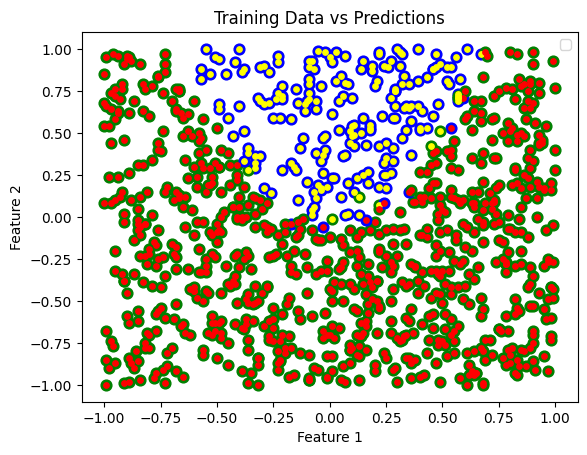

In [92]:
fig, ax = plt.subplots()

# Define marker types based on the target values (+1 or -1)
markers = {1: 'o', -1: 'o'}
colors = {1: 'green', -1: 'blue'}

for i in range(len(X)):
    marker = markers[y.iloc[i]]
    color = colors[y.iloc[i]]
    ax.scatter(X[i, 0], X[i, 1], marker=marker, s=60, color=color, )



markersp = {1: '+', -1: '+'}
for i in range(len(X)):
    marker = markers[predictions2[i]]
    color = 'red' if predictions2[i] == 1 else 'yellow'
    ax.scatter(X[i, 0], X[i, 1], marker=marker, s=15, color=color,)




# Customize the plot
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Training Data vs Predictions')
ax.legend()

# Show the plot
plt.show()

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


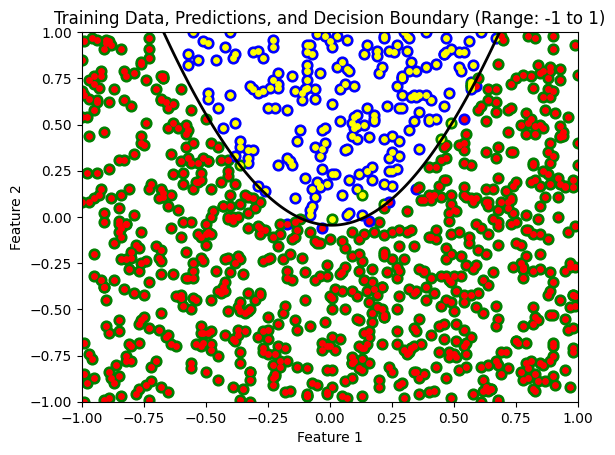

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Initialize and train the logistic regression model
model2 = LogisticRegression(penalty='none', solver='lbfgs')
model2.fit(Xe, ye)

# Define a function to calculate the decision boundary
def decision_boundary(X1, X2, model):
    b0 = model.intercept_[0]
    b1, b2, b3, b4 = model.coef_[0]
    return b0 + b1*X1 + b2*X2 + b3*X1**2 + b4*X2**2

# Create a meshgrid for the feature space within the range of -1 to 1
xx1, xx2 = np.meshgrid(np.linspace(-1, 1, 400), np.linspace(-1, 1, 400))
# Calculate the decision boundary values for the meshgrid points
Z = decision_boundary(xx1.ravel(), xx2.ravel(), model2)
Z = Z.reshape(xx1.shape)

# Plot the decision boundary, training data, and predictions
fig, ax = plt.subplots()

# Define marker types based on the target values (+1 or -1)
markers = {1: 'o', -1: 'o'}
colors = {1: 'green', -1: 'blue'}

for i in range(len(X)):
    marker = markers[y.iloc[i]]
    color = colors[y.iloc[i]]
    ax.scatter(X[i, 0], X[i, 1], marker=marker, s=60, color=color, )



markersp = {1: '+', -1: '+'}
for i in range(len(X)):
    marker = markers[predictions2[i]]
    color = 'red' if predictions2[i] == 1 else 'yellow'
    ax.scatter(X[i, 0], X[i, 1], marker=marker, s=15, color=color,)

# Plot decision boundary
ax.contour(xx1, xx2, Z, levels=[0], linewidths=2, colors='black')

# Customize the plot
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Training Data, Predictions, and Decision Boundary (Range: -1 to 1)')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()